In [136]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy.io.wavfile as wavfile
import time

EX1. Generați un semnal sinusoidal de tip sinus, de amplitudine, frecvență și fază aleasă de voi. Generați apoi un semnal de tip cosinus astfel încât pe orizontul de timp ales, acesta să fie identic cu semnalul sinus. Verificați afișându-le grafic în două subplot-uri diferite.

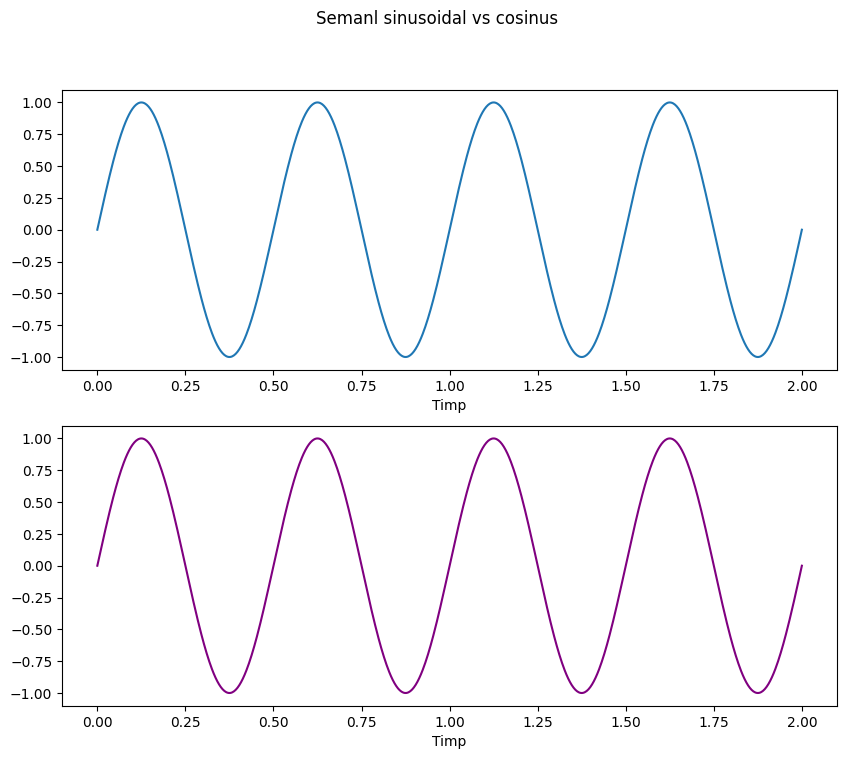

In [137]:
sin_wave = lambda t: np.sin(2 * np.pi * 2 * t)
cos_wave = lambda t: np.cos(2 * np.pi * 2 * t - np.pi / 2)

t = np.linspace(0, 2, 800) 

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
plt.suptitle("Semanl sinusoidal vs cosinus")

axs[0].plot(t, sin_wave(t))
axs[0].set_xlabel('Timp')

axs[1].plot(t, cos_wave(t), 'purple')
axs[1].set_xlabel('Timp')

plt.show()

EX2. Generați un semnal sinusoidal de amplitudine unitară și frecvență aleasă de voi. Încercați 4 valori diferite pentru fază. Afișați toate semnalele pe același grafic.

Pentru unul dintre semnalele anteriore, adăugați zgomot aleator sinusoidei eșantionate generate. Noul semnal este $x[n]+\gamma z[n]$ astfel încât raportul semnal zgomot (Signal to Noise Ratio sau SNR) să fie $\{0.1,1,10,100\}$. SNR este definit astfel: SNR $=\frac{\|x\|_{2}^{2}}{\gamma^{2}\|z\|_{2}^{2}}$. Vectorul $z$ este generat eșantionând distribuția Gaussiană standard iar parametrul $\gamma$ se calculează astfel încât să avem valorile SNR dorite.

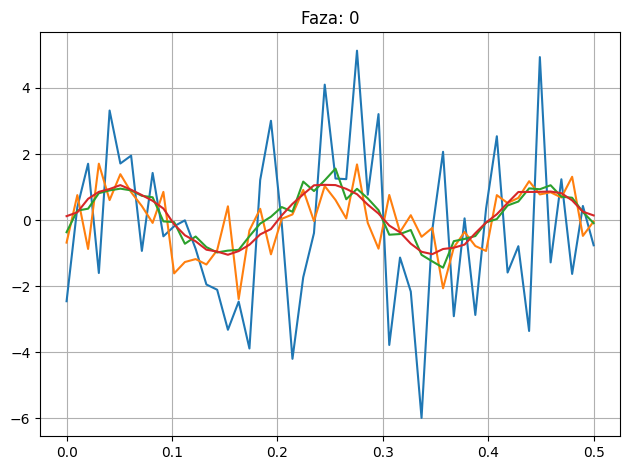

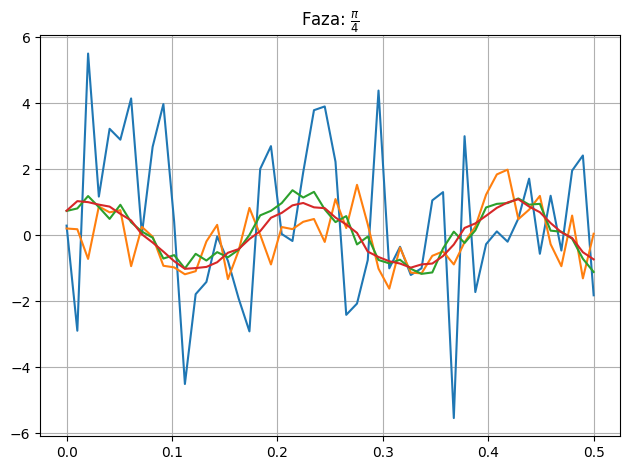

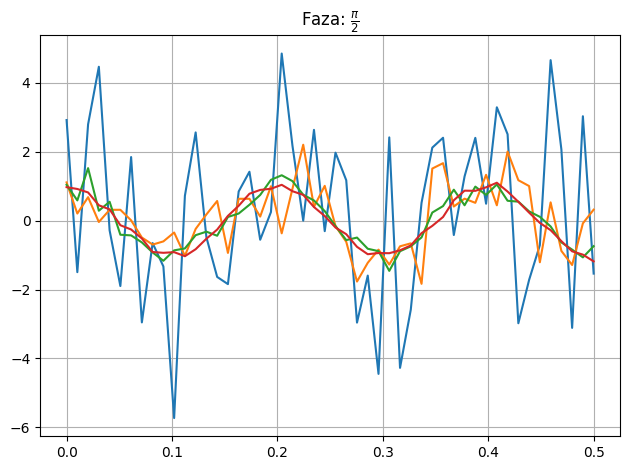

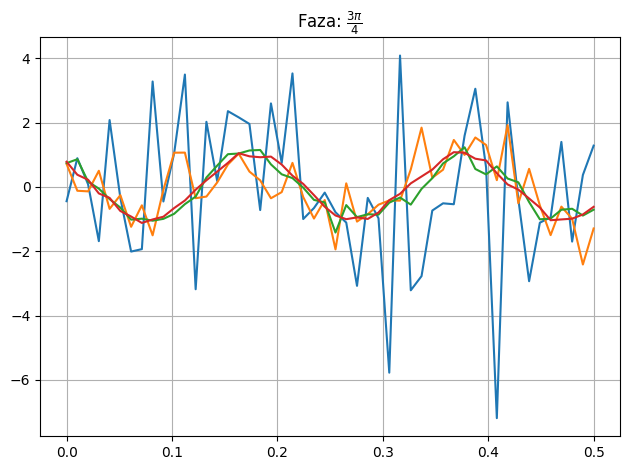

In [158]:
def format_phase(phase_value):
    N = int(4 * phase_value / np.pi)
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\frac{\pi}{4}$"
    elif N == 2:
        return r"$\frac{\pi}{2}$"
    elif N == 3:
        return r"$\frac{3\pi}{4}$"
    
def add_noise(x, snr):
    z = np.random.randn(x.size)
    gamma = np.sqrt(np.linalg.norm(x)**2 / (np.linalg.norm(z)**2 * snr))
    return x + gamma * z

freq = 5
phase = [0, np.pi/4, np.pi/2, 3*np.pi/4]
SNR = [0.1, 1, 10, 100]

fs = 100
duration = 0.5       
t = np.linspace(0, duration, int(fs * duration))

for ph in phase:
    formatted_phase = format_phase(ph)
    sin_wave = np.sin(2 * np.pi * freq * t + ph)

    for snr in SNR:
        noisy_signal = add_noise(sin_wave, snr)
        plt.plot(t, noisy_signal, label=f'SNR: {snr}')
    
    plt.title(f'Faza: {formatted_phase}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

EX3. Ascultați semnalele pe care le-ați generat la laboratorul precedent pentru exercițiile 2.(a)-(d) folosind biblioteca sounddevice. Salvați unul din semnale ca fișier . wav și verificați că îl puteți încărca de pe disc utilizând scipy.io.wavfile.read().

In [147]:
fs = 44100 

def play_sound(signal, fs, filename=None):
    sd.play(signal, fs)
    time.sleep(len(signal) / fs)
    
    if filename:
        wavfile.write(filename, fs, signal)

# (a) 400Hz, 1600 esantioane
samples = 1600
t = np.linspace(0, samples / fs, samples)
signal_a = 0.5 * np.sin(2 * np.pi * 400 * t) 
play_sound(signal_a, fs)  # foarte scurt, 1600/44100 = ~0.36s

# (b) 800Hz, 3 secunde
duration = 3
t = np.linspace(0, duration, fs)
signal_b = 0.5 * np.sin(2 * np.pi * 800 * t)
play_sound(signal_b, fs)  

# (c) 240Hz sawtooth
duration = 1
t = np.linspace(0, duration, fs)
signal_c = 2 * (240 * t - np.floor(240 * t))
play_sound(signal_c, fs)  

# (d) 300Hz square
duration = 1 
t = np.linspace(0, duration, fs)
signal_d = np.sign(np.sin(2 * np.pi * 300 * t))  
play_sound(signal_d, fs, "signal_d.wav")  

rate, _ = wavfile.read("signal_d.wav")
print(f"Frecventa de esantionare: {rate}")

Frecventa de esantionare: 44100


EX4. Generați două semnale cu forme de undă diferite (ex., unul sinusoidal, celălalt sawtooth) și adunați-le eșantioanele. Afișați grafic cele două semnale inițiale și suma lor, fiecare în câte un subplot.

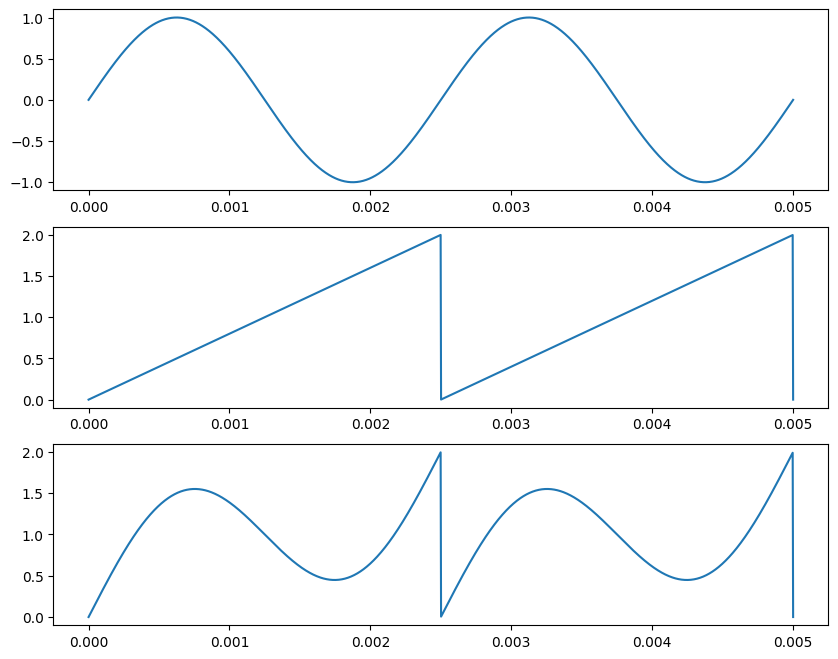

In [148]:
t = np.linspace(0, 2/400 , 1600)

freq = 400
sin_wave = np.sin(2 * np.pi * freq * t) 

sawtooth = 2 * (t * freq - np.floor(t * freq))  

combined_signal = sawtooth + sin_wave

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(t, sin_wave)
axs[1].plot(t, sawtooth)
axs[2].plot(t, combined_signal)

plt.show()

EX5. Generați două semnale cu aceeași formă de undă, dar de frecvențe diferite, și puneți-le unul după celălalt în același vector. Redați audio rezultatul și notați ce observați.

In [149]:
fs = 44100
t = np.linspace(0, 1 , fs)

sig1 = np.sin(2 * np.pi * 400 * t) 
sig2 = np.sin(2 * np.pi * 800 * t)

sig = np.concatenate([sig1, sig2])

play_sound(sig, fs)

# Fiind concatenate imediata una dupa alta diferenta e usor sesizabila intre cele doua semnale. Al doilea semnal este mai ascutit decat primul datorita frecventei duble.

EX6. Generați 3 semnale de tip sinus cu amplitudine unitară și fază nulă având frecventele fundamentale:

(a) f=fs / 2

(b) f=fs / 4

(c) f=0 Hz

unde fs este frecvența de eșantionare, aleasă de voi. Notați ce observați.

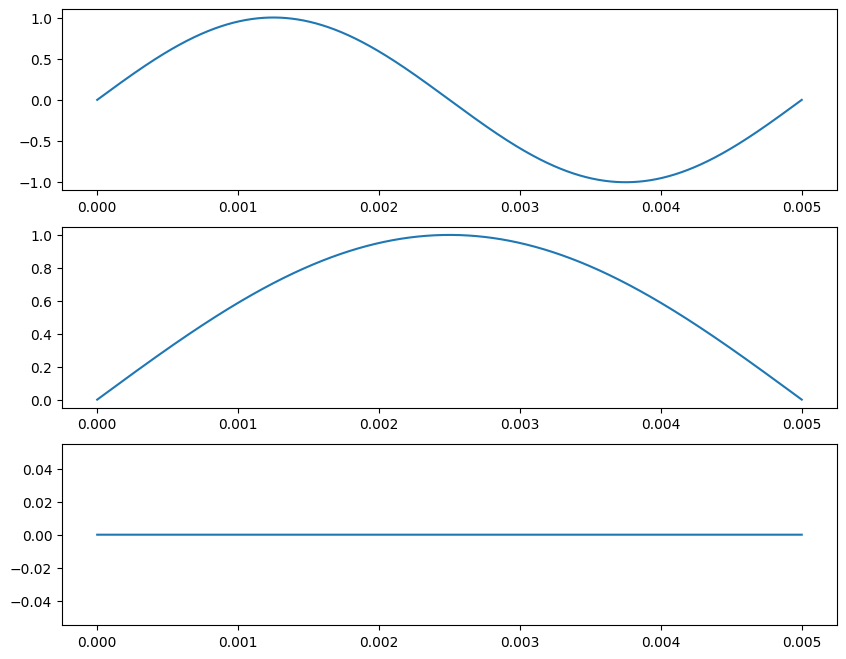

In [150]:
fs = 400
t = np.linspace(0, 2/400 , 1600)

sig_a = np.sin(2 * np.pi * (fs / 2) * t) 
sig_b = np.sin(2 * np.pi * (fs / 4) * t)
sig_c = np.sin(2 * np.pi * 0 * t)

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(t, sig_a)
axs[1].plot(t, sig_b)
axs[2].plot(t, sig_c)

plt.show()


EX7. Generați un semnal sinusoidal cu frecvența de eșantionare $1000 \mathrm{~Hz}$ și decimați-l la 1/4 din frecvența inițială (păstrați doar al 4-lea fiecare element din vector):

(a) Afișați grafic cele două semnale și comentați diferențele.

(b) Repetați decimarea (tot la $1 / 4$ din frecvența inițială) pornind acum de la al doilea element din vector. Ce observati?

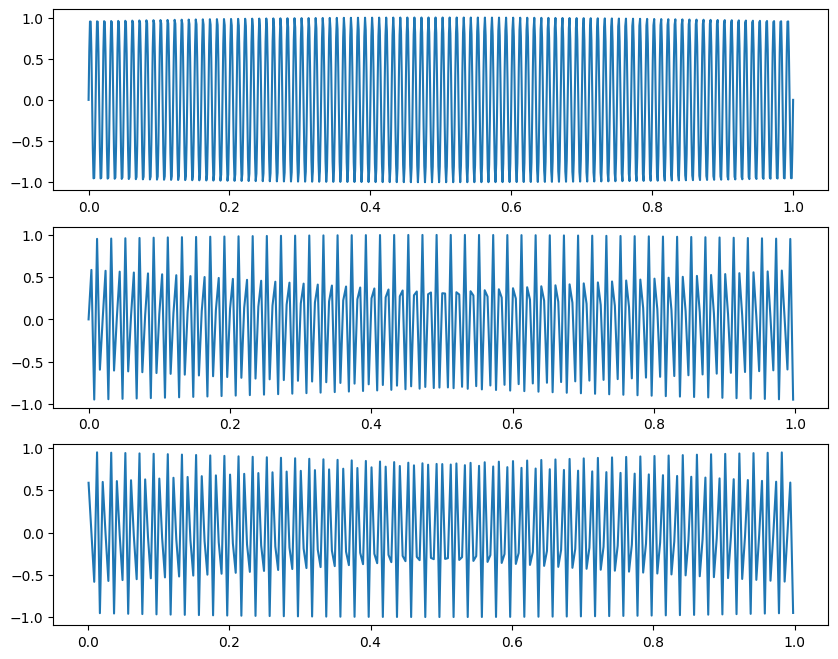

In [151]:
# Varianta 1
fs = 1000  
duration = 1 
freq = 100   

t = np.linspace(0, duration, fs)  
sin_wave = np.sin(2 * np.pi * freq * t) 

sin_wave_decimated = sin_wave[::4]
t_decimated = t[::4]

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(t, sin_wave)
axs[1].plot(t_decimated, sin_wave_decimated)

sin_wave_decimated_offset = sin_wave[1::4]
t_decimated_offset = t[1::4]

axs[2].plot(t_decimated_offset, sin_wave_decimated_offset)
plt.show()

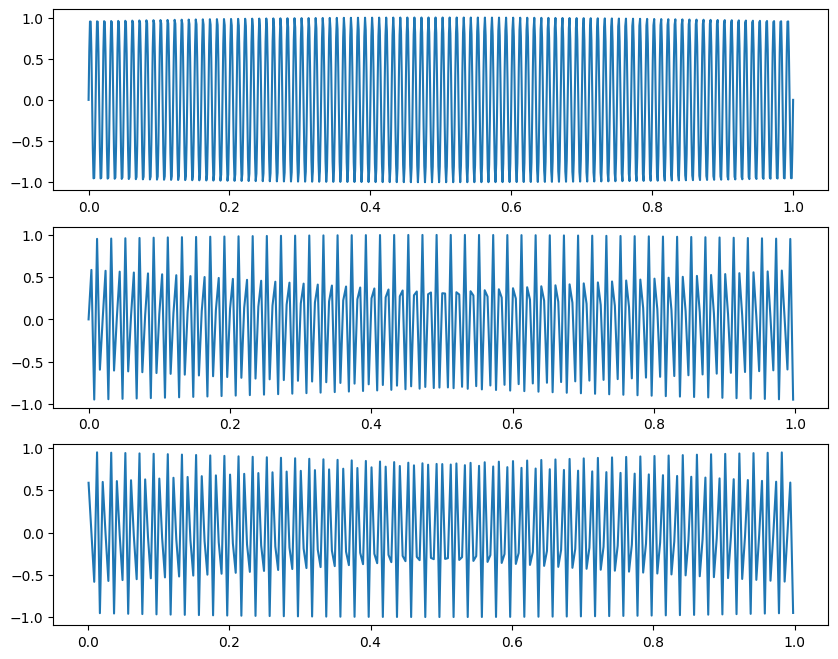

In [152]:
# Varianta 2
fs = 1000  
duration = 1 
freq = 100

t = np.linspace(0, duration, fs)  
t_decimated = t[::4]

sin_wave = np.sin(2 * np.pi * freq * t) 
sin_wave_decimated = np.sin(2 * np.pi * freq * t_decimated) 

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(t, sin_wave)
axs[1].plot(t_decimated, sin_wave_decimated)

t_decimated_offset = t[1::4]
sin_wave_decimated_offset = np.sin(2 * np.pi * freq * t_decimated_offset) 

axs[2].plot(t_decimated_offset, sin_wave_decimated_offset)
plt.show()

# Reducand rata de esantionare prin pastrarea doar celui de-al patrulea element, semnalul decimat este mai putin smooth. Incepand de la al doilea element situatia se prezinta la fel doar ca shiftata.

EX8. În practică se operează des cu următoarea aproximare: pentru valori mici ale lui $\alpha, \sin (\alpha) \approx \alpha$. Verificați dacă această aproximare este corectă, reprezentând grafic cele două curbe pentru valori ale lui $\alpha$ în intervalul $[-\pi / 2, \pi / 2]$. Arătați și un grafic cu eroarea dintre cele două funcții. Folosiți și aproximarea Pade $\sin (\alpha) \approx \frac{\alpha-\frac{7 \alpha^{3}}{60}}{1+\frac{\alpha^{2}}{20}}$, nu doar Taylor.

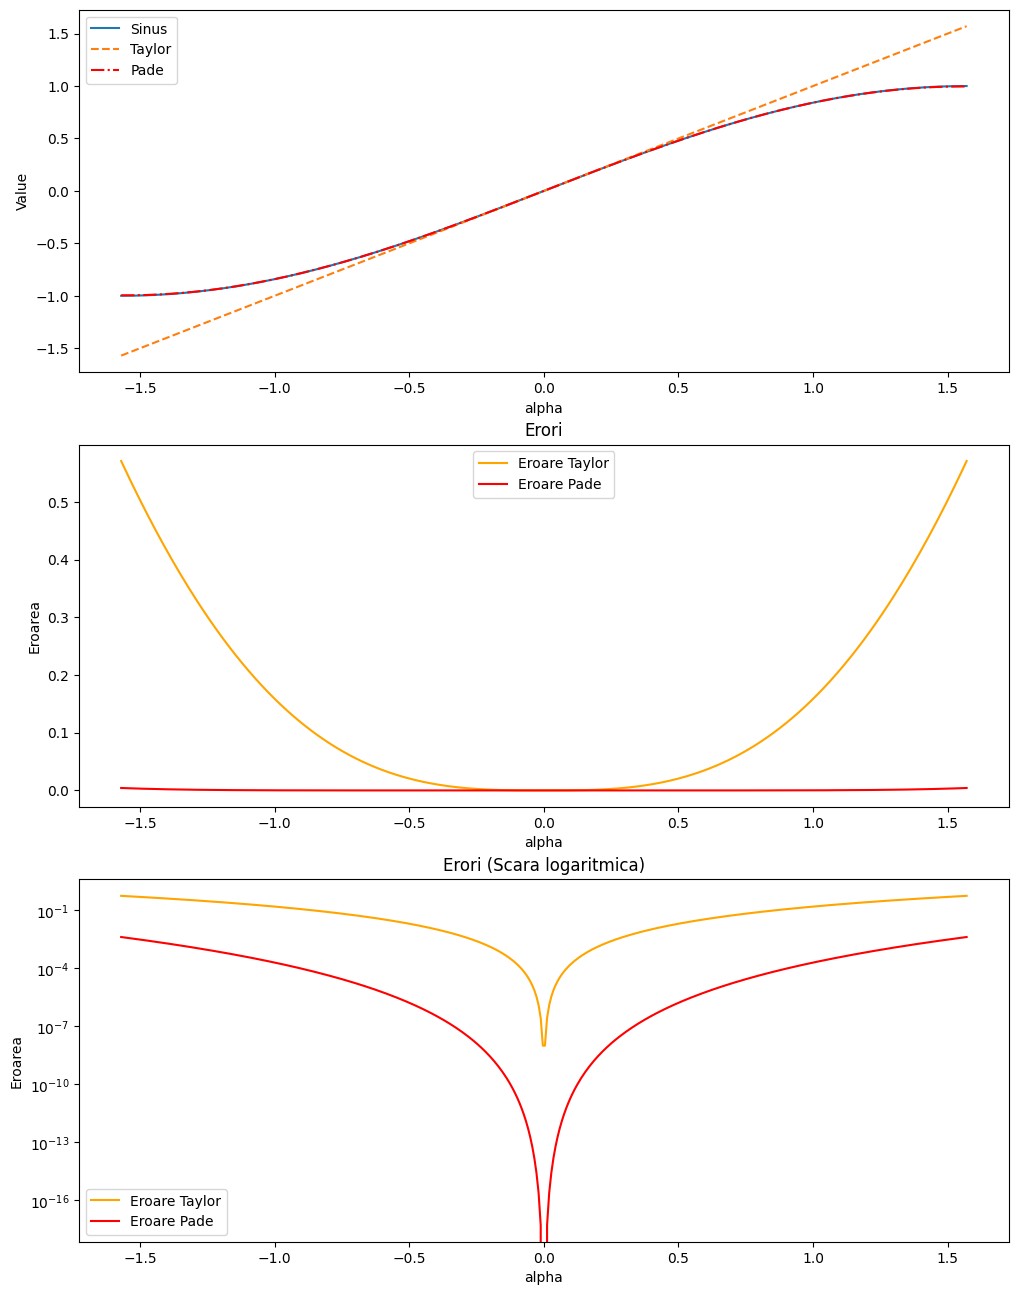

In [153]:
alpha = np.linspace(-np.pi / 2, np.pi / 2, 400)

sin = np.sin(alpha)
taylor = alpha
pade = (alpha - (7 * alpha ** 3) / 60) / (1 + alpha ** 2 / 20)

error_taylor = np.abs(sin - taylor)
error_pade = np.abs(sin - pade)

fig, axs = plt.subplots(3, 1, figsize=(12, 16))

axs[0].plot(alpha, sin, label='Sinus')
axs[0].plot(alpha, taylor, label='Taylor', linestyle='--')
axs[0].plot(alpha, pade, label='Pade', linestyle='-.', color = 'r')
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('Value')
axs[0].legend()

axs[1].plot(alpha, error_taylor, label='Eroare Taylor', color = 'orange')
axs[1].plot(alpha, error_pade, label="Eroare Pade", color = 'r')
axs[1].set_title('Erori')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('Eroarea')
axs[1].legend()

axs[2].semilogy(alpha, error_taylor, label='Eroare Taylor', color = 'orange')
axs[2].semilogy(alpha, error_pade, label="Eroare Pade", color = 'r')
axs[2].set_title('Erori (Scara logaritmica)')
axs[2].set_xlabel('alpha')
axs[2].set_ylabel('Eroarea')
axs[2].legend()

plt.show()